In [1]:
import pandas as pd
df = pd.read_csv('NFLX2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [2]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2021-03-22')
datetime_object
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [3]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5243   2023-03-22
5244   2023-03-23
5245   2023-03-24
5246   2023-03-27
5247   2023-03-28
Name: Date, Length: 5248, dtype: datetime64[ns]

In [4]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2023-03-22,306.309998,306.450012,293.540009,293.899994,293.899994,5808000
2023-03-23,304.679993,322.779999,304.140015,320.369995,320.369995,15653300
2023-03-24,320.630005,331.829987,320.630005,328.390015,328.390015,12991700


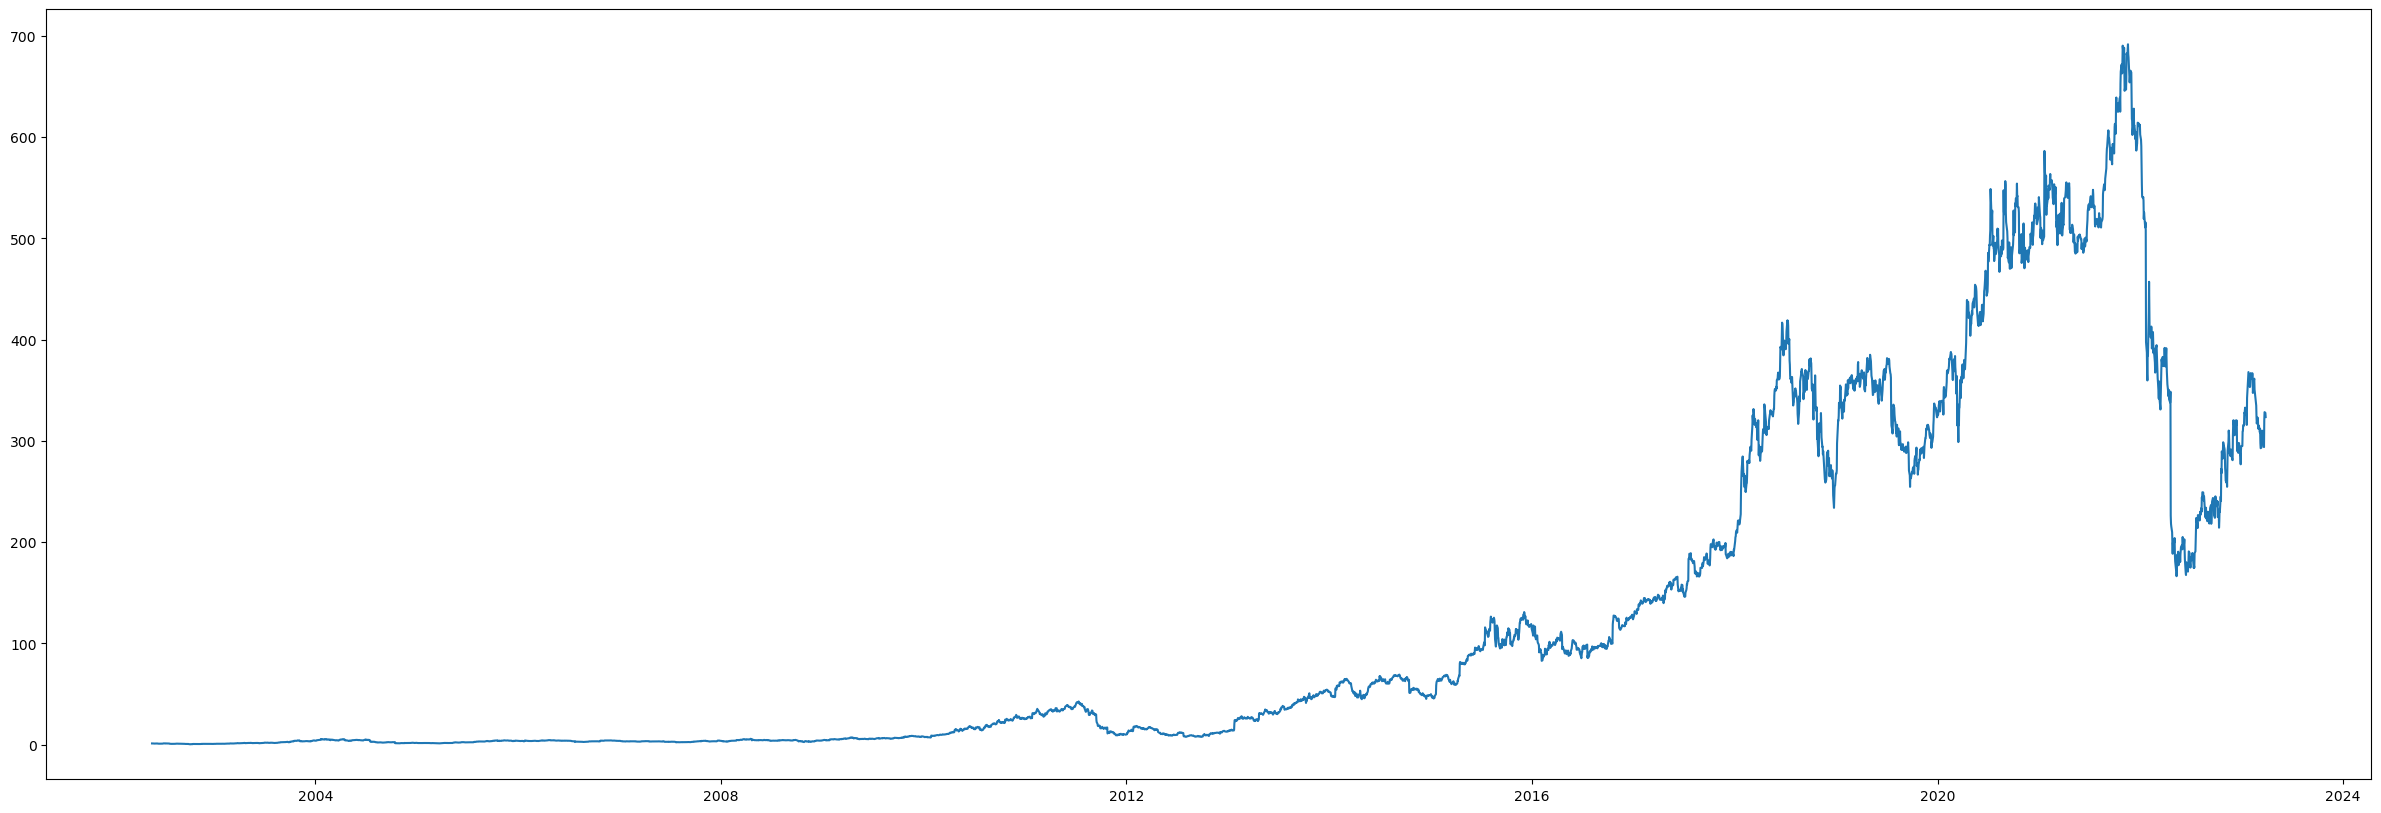

In [14]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [15]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2002-05-29', 
                                '2023-03-28', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2002-05-29,1.196429,1.210000,1.157143,1.103571
1,2002-05-30,1.210000,1.157143,1.103571,1.071429
2,2002-05-31,1.157143,1.103571,1.071429,1.076429
3,2002-06-03,1.103571,1.071429,1.076429,1.128571
4,2002-06-04,1.071429,1.076429,1.128571,1.117857
...,...,...,...,...,...
5240,2023-03-22,303.500000,305.130005,305.790009,293.899994
5241,2023-03-23,305.130005,305.790009,293.899994,320.369995
5242,2023-03-24,305.790009,293.899994,320.369995,328.390015
5243,2023-03-27,293.899994,320.369995,328.390015,327.660004


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((5245,), (5245, 3, 1), (5245,))

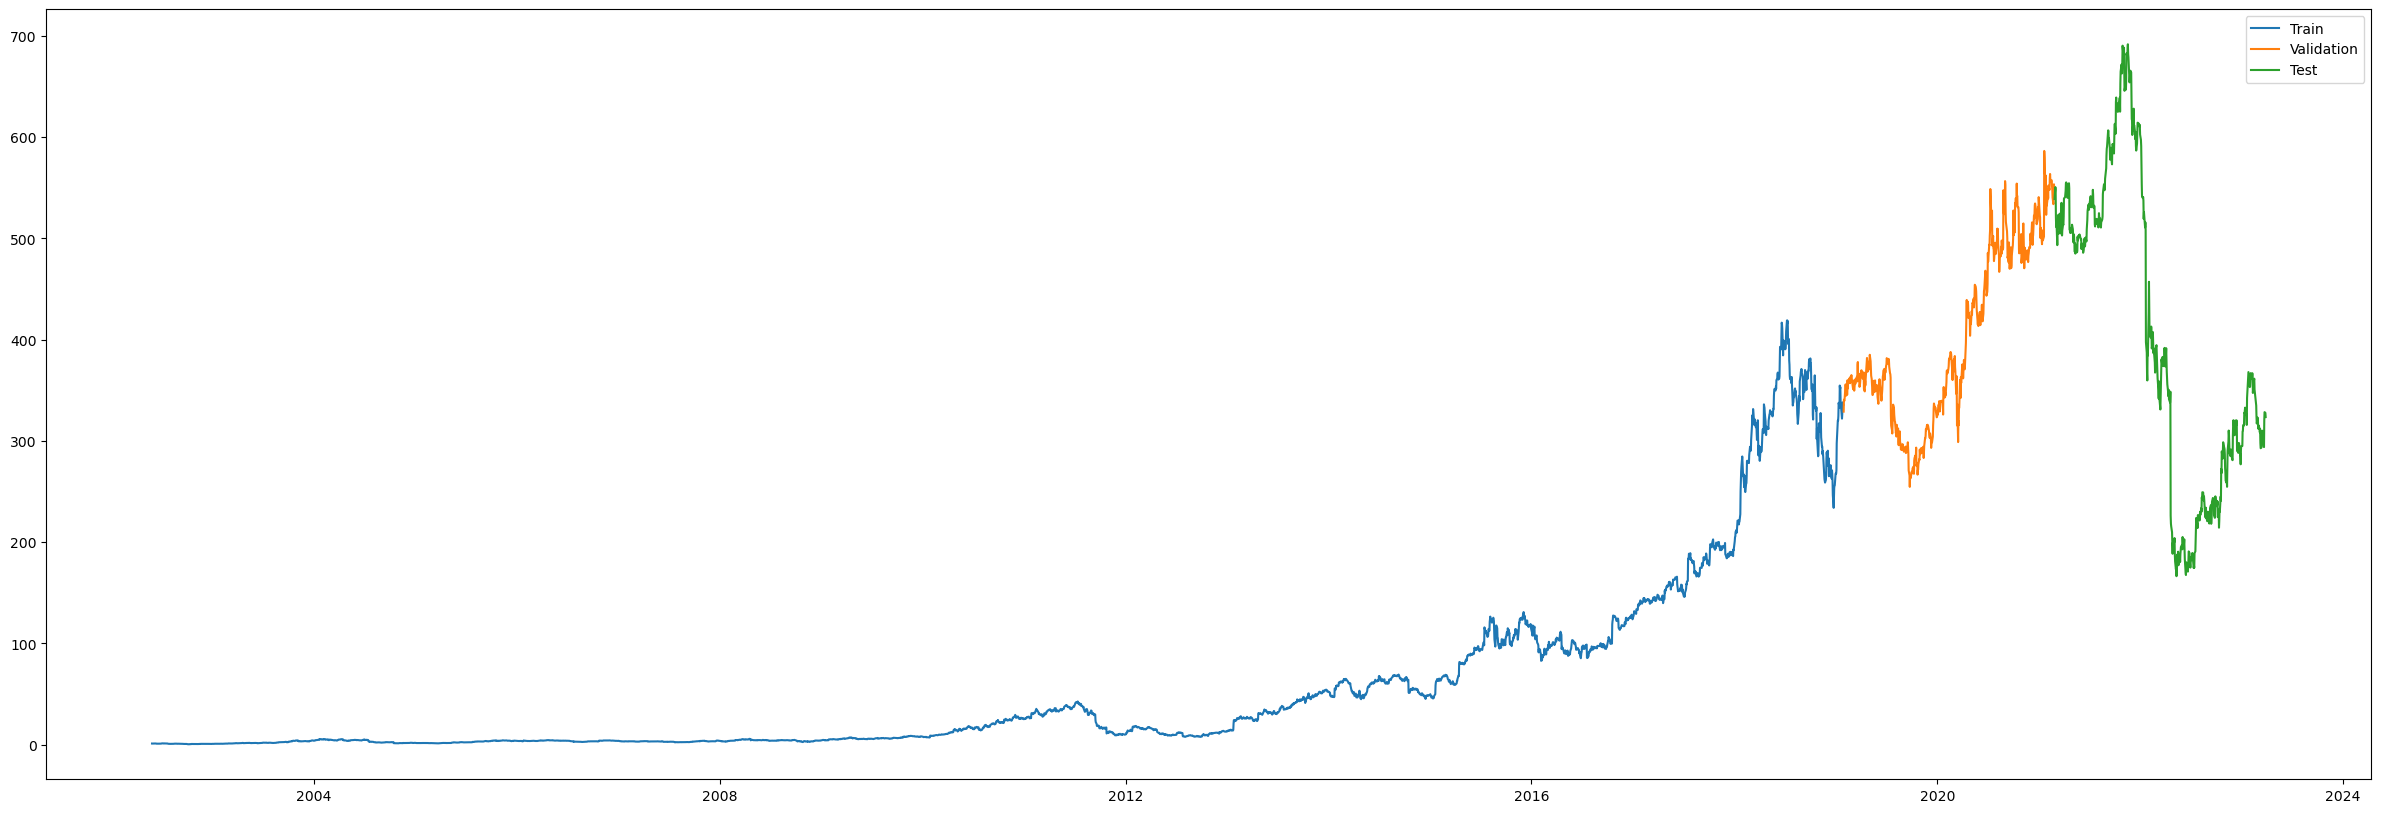

In [17]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
132/132 [==============================] - 10s 15ms/step - loss: 6741.6792 - mean_absolute_error: 36.2606 - val_loss: 61359.3398 - val_mean_absolute_error: 232.4993
Epoch 2/100
132/132 [==============================] - 1s 8ms/step - loss: 377.4365 - mean_absolute_error: 5.0426 - val_loss: 10374.7881 - val_mean_absolute_error: 74.1259
Epoch 3/100
132/132 [==============================] - 1s 7ms/step - loss: 27.1359 - mean_absolute_error: 1.8861 - val_loss: 6580.5645 - val_mean_absolute_error: 54.6096
Epoch 4/100
132/132 [==============================] - 1s 8ms/step - loss: 30.8172 - mean_absolute_error: 2.1818 - val_loss: 6290.1162 - val_mean_absolute_error: 55.7288
Epoch 5/100
132/132 [==============================] - 1s 6ms/step - loss: 22.8175 - mean_absolute_error: 1.8429 - val_loss: 6785.0190 - val_mean_absolute_error: 54.7340
Epoch 6/100
132/132 [==============================] - 1s 6ms/step - loss: 16.3719 - mean_absolute_error: 1.6926 - val_loss: 5239.6260 - val_

Epoch 49/100
132/132 [==============================] - 2s 12ms/step - loss: 11.5376 - mean_absolute_error: 1.3110 - val_loss: 1656.8328 - val_mean_absolute_error: 27.6682
Epoch 50/100
132/132 [==============================] - 1s 6ms/step - loss: 10.6296 - mean_absolute_error: 1.3728 - val_loss: 2361.5403 - val_mean_absolute_error: 32.0276
Epoch 51/100
132/132 [==============================] - 1s 6ms/step - loss: 12.9327 - mean_absolute_error: 1.4677 - val_loss: 2046.7567 - val_mean_absolute_error: 30.1593
Epoch 52/100
132/132 [==============================] - 1s 6ms/step - loss: 11.1423 - mean_absolute_error: 1.3519 - val_loss: 1948.3247 - val_mean_absolute_error: 29.8804
Epoch 53/100
132/132 [==============================] - 1s 8ms/step - loss: 18.6870 - mean_absolute_error: 1.8976 - val_loss: 3533.7551 - val_mean_absolute_error: 43.7432
Epoch 54/100
132/132 [==============================] - 1s 7ms/step - loss: 11.0762 - mean_absolute_error: 1.3310 - val_loss: 2211.9531 - val_me

Epoch 97/100
132/132 [==============================] - 1s 6ms/step - loss: 13.0782 - mean_absolute_error: 1.4342 - val_loss: 1845.3198 - val_mean_absolute_error: 29.9737
Epoch 98/100
132/132 [==============================] - 1s 6ms/step - loss: 16.0931 - mean_absolute_error: 1.6169 - val_loss: 2473.1685 - val_mean_absolute_error: 32.9648
Epoch 99/100
132/132 [==============================] - 1s 7ms/step - loss: 18.8754 - mean_absolute_error: 1.9922 - val_loss: 3145.4507 - val_mean_absolute_error: 39.3902
Epoch 100/100
132/132 [==============================] - 1s 6ms/step - loss: 11.3252 - mean_absolute_error: 1.3380 - val_loss: 2232.9575 - val_mean_absolute_error: 30.5796


132/132 [==============================] - 1s 3ms/step


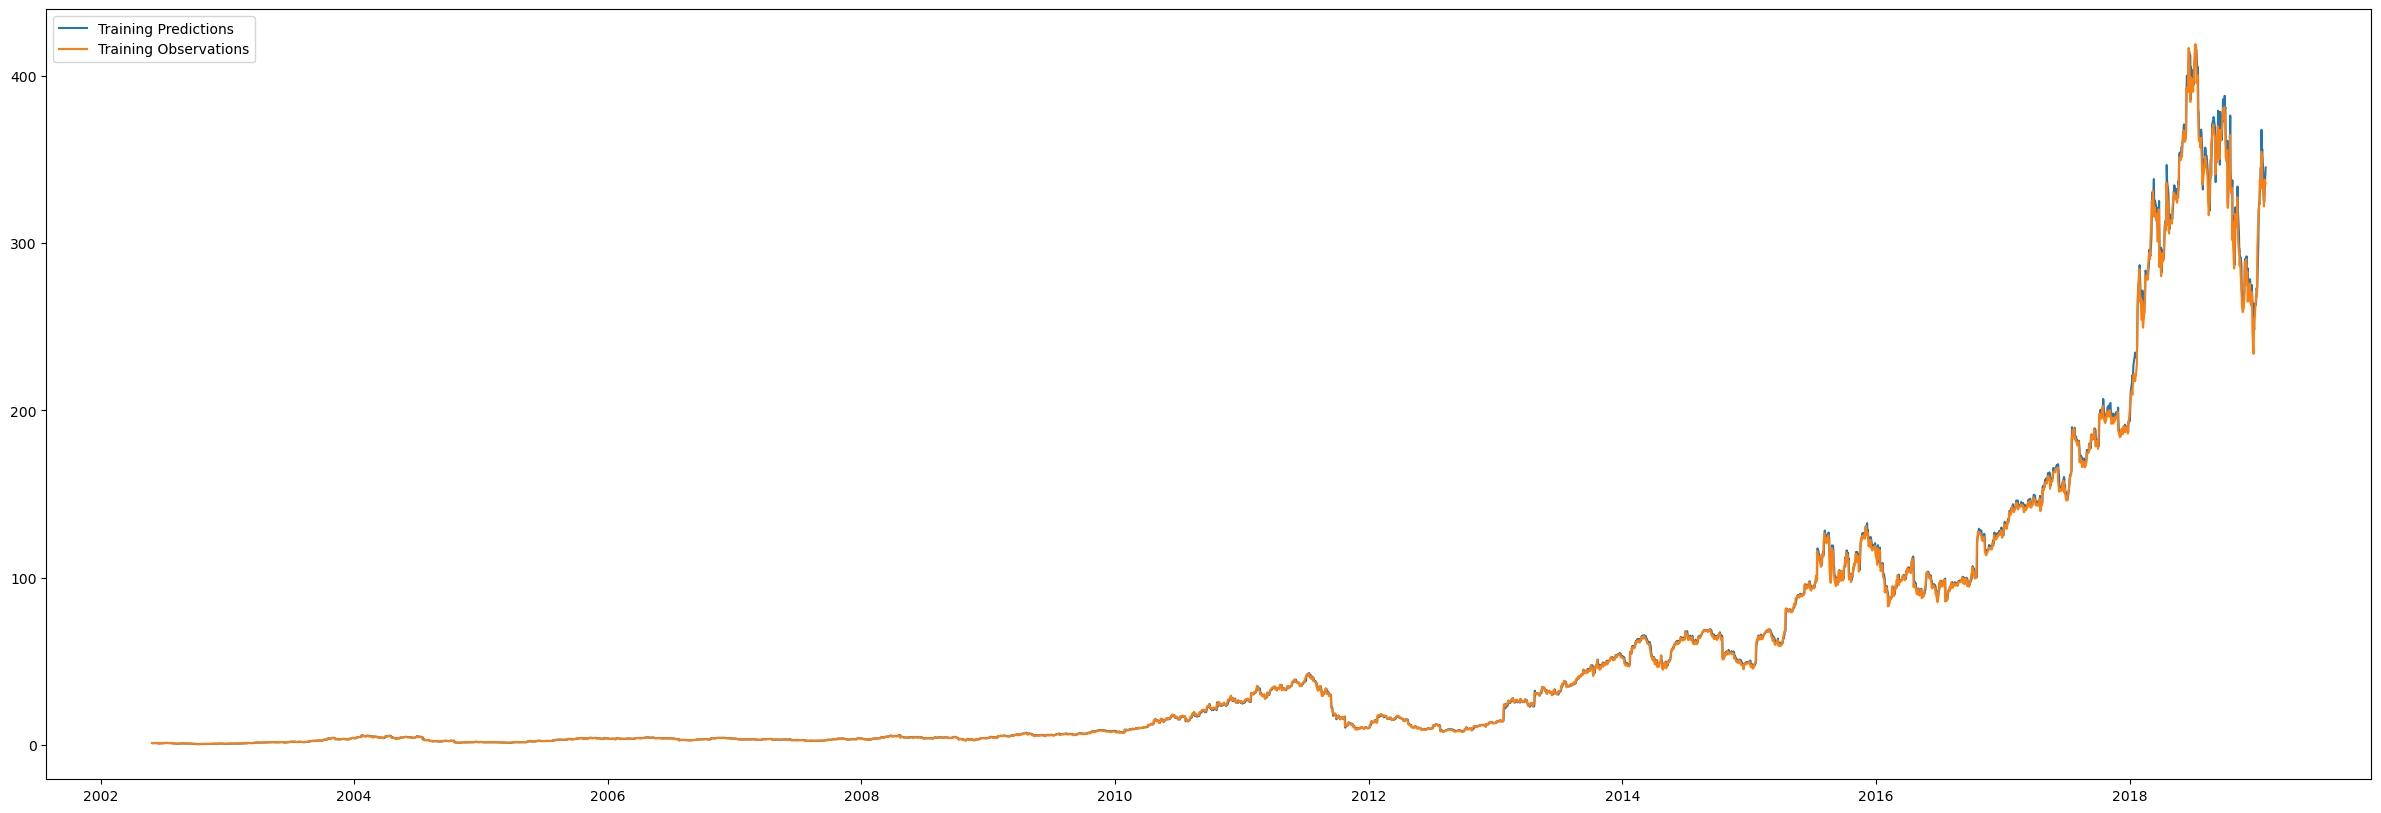

In [19]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 3ms/step


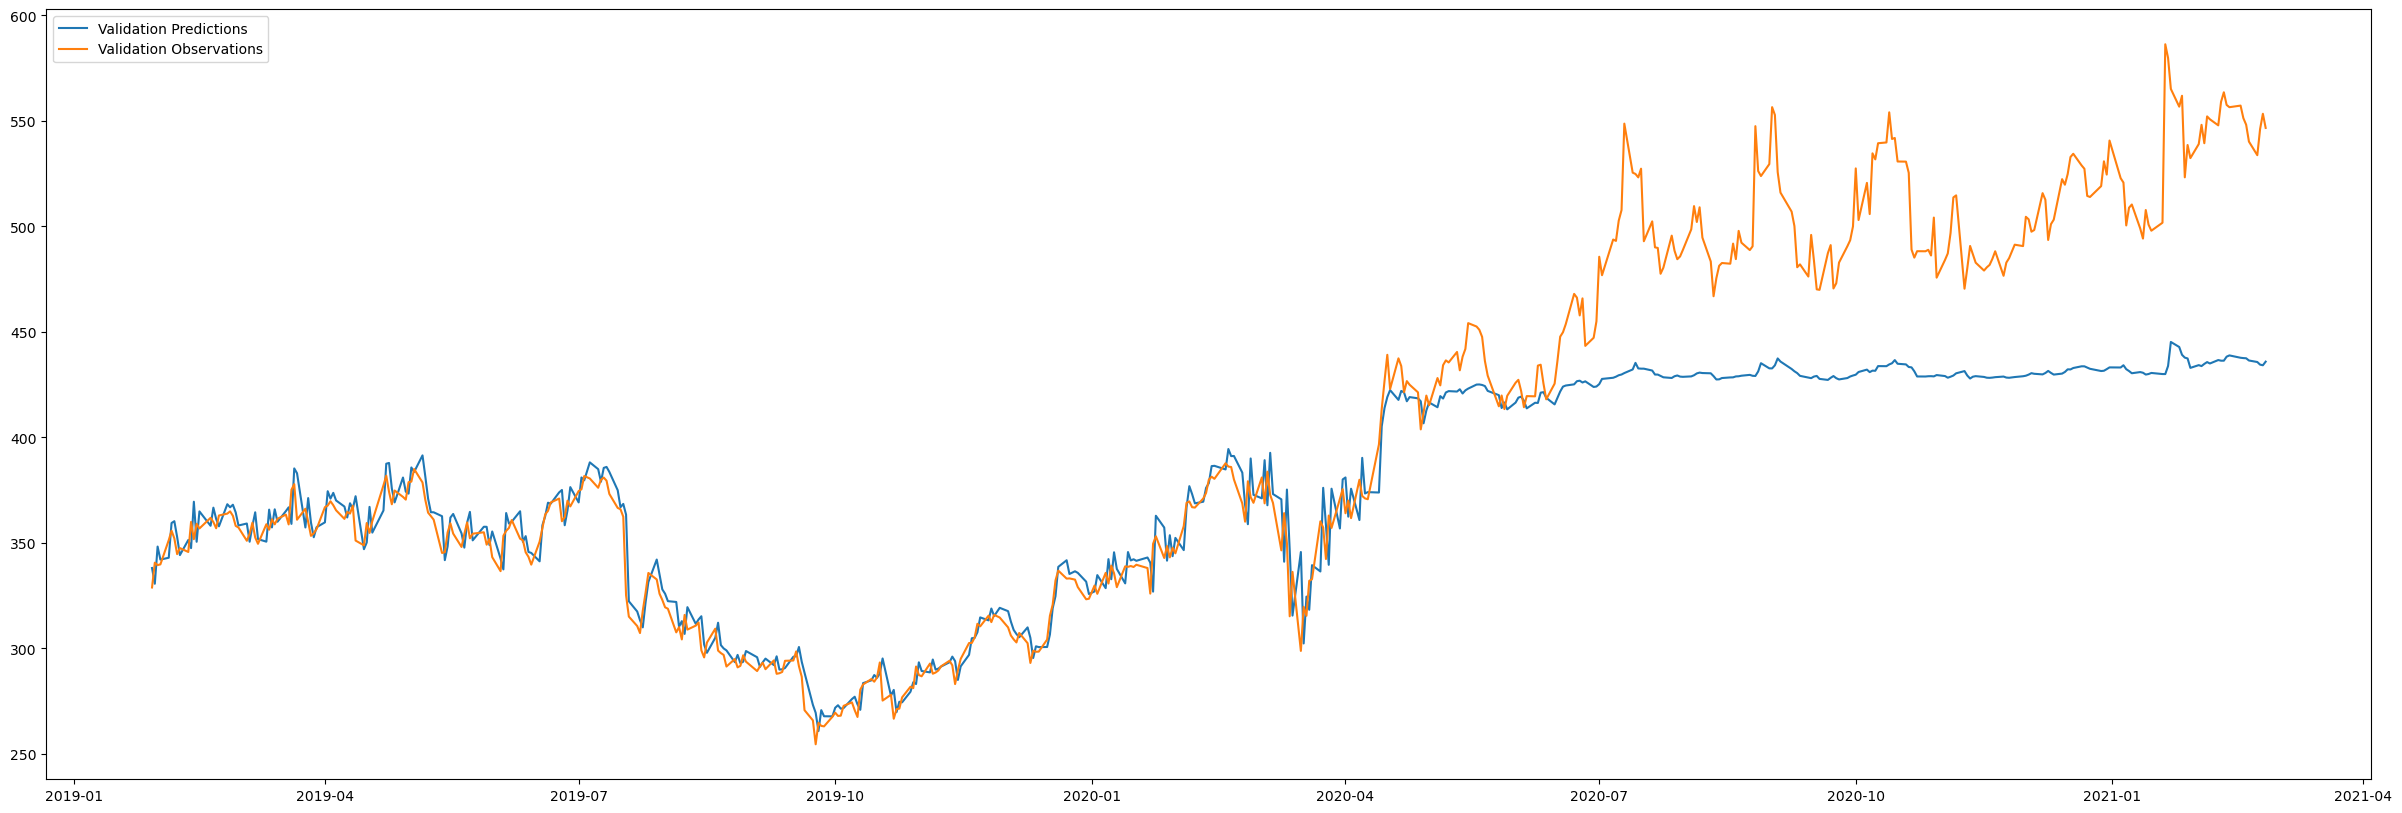

In [20]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

17/17 [==============================] - 0s 3ms/step


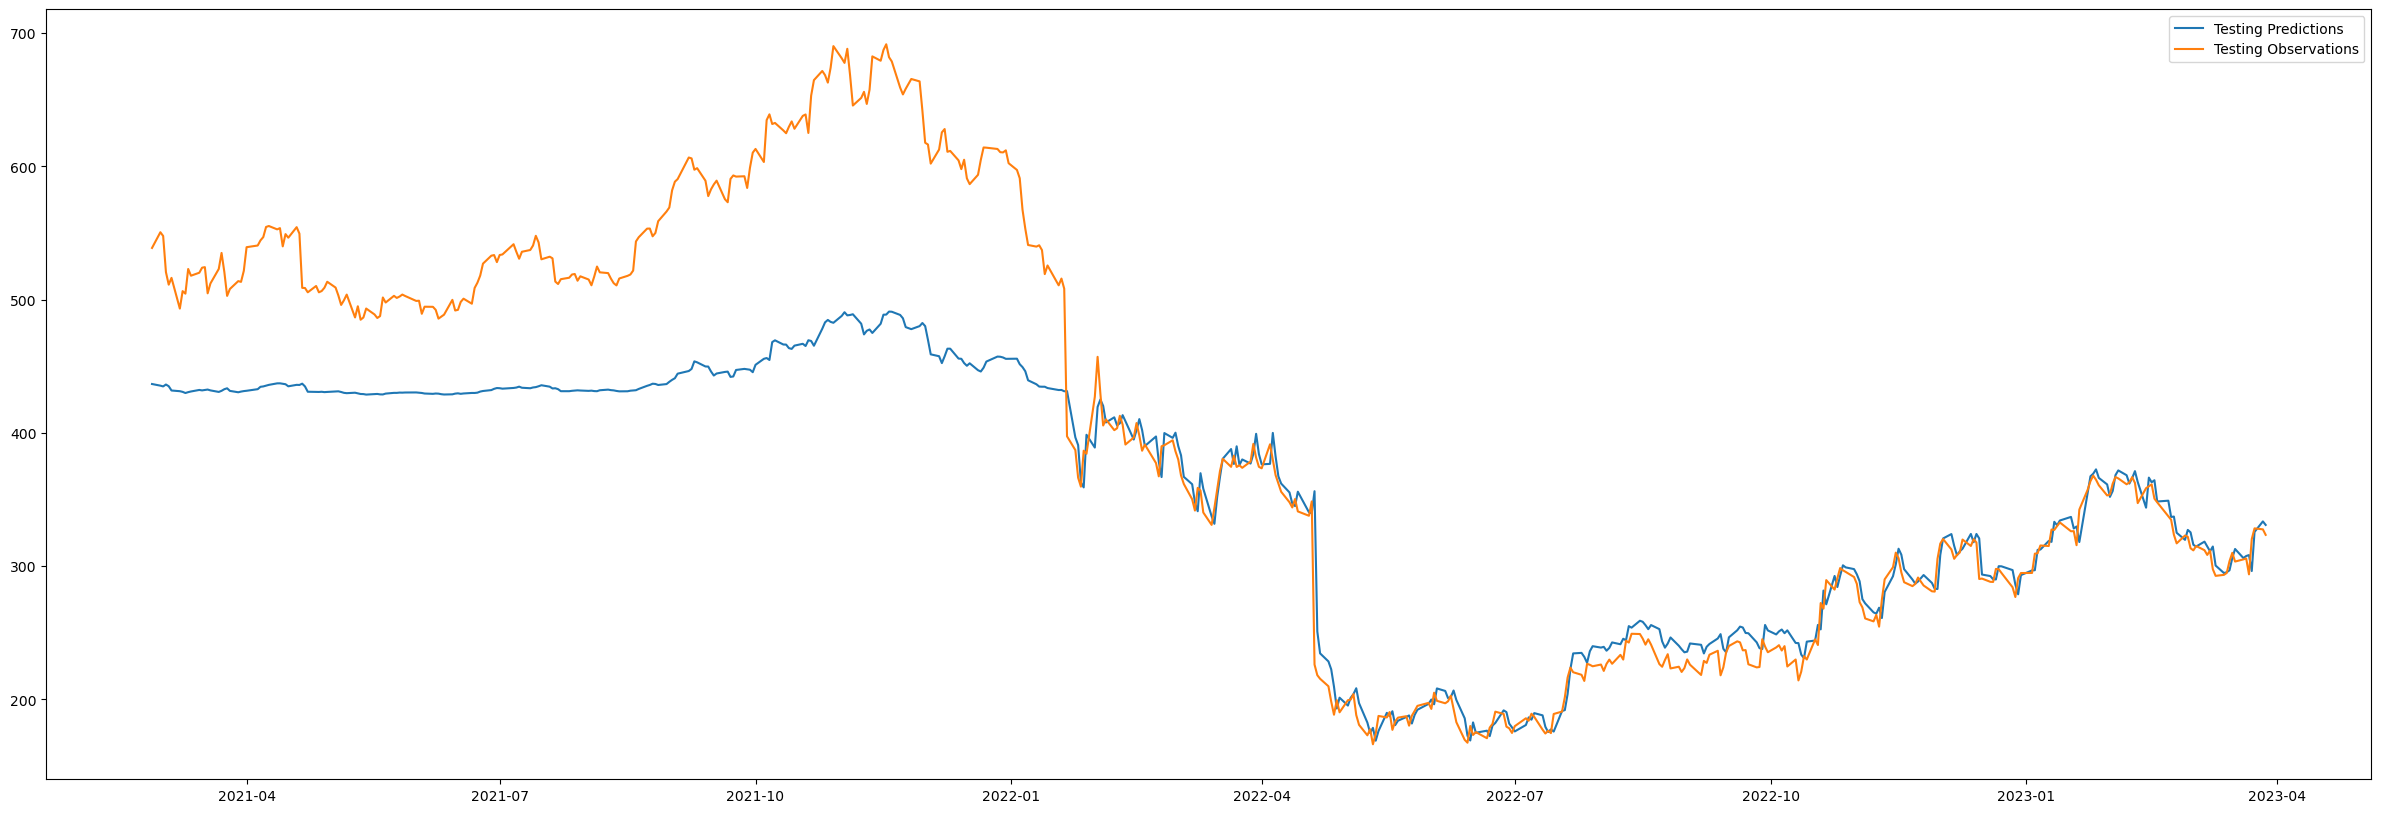

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

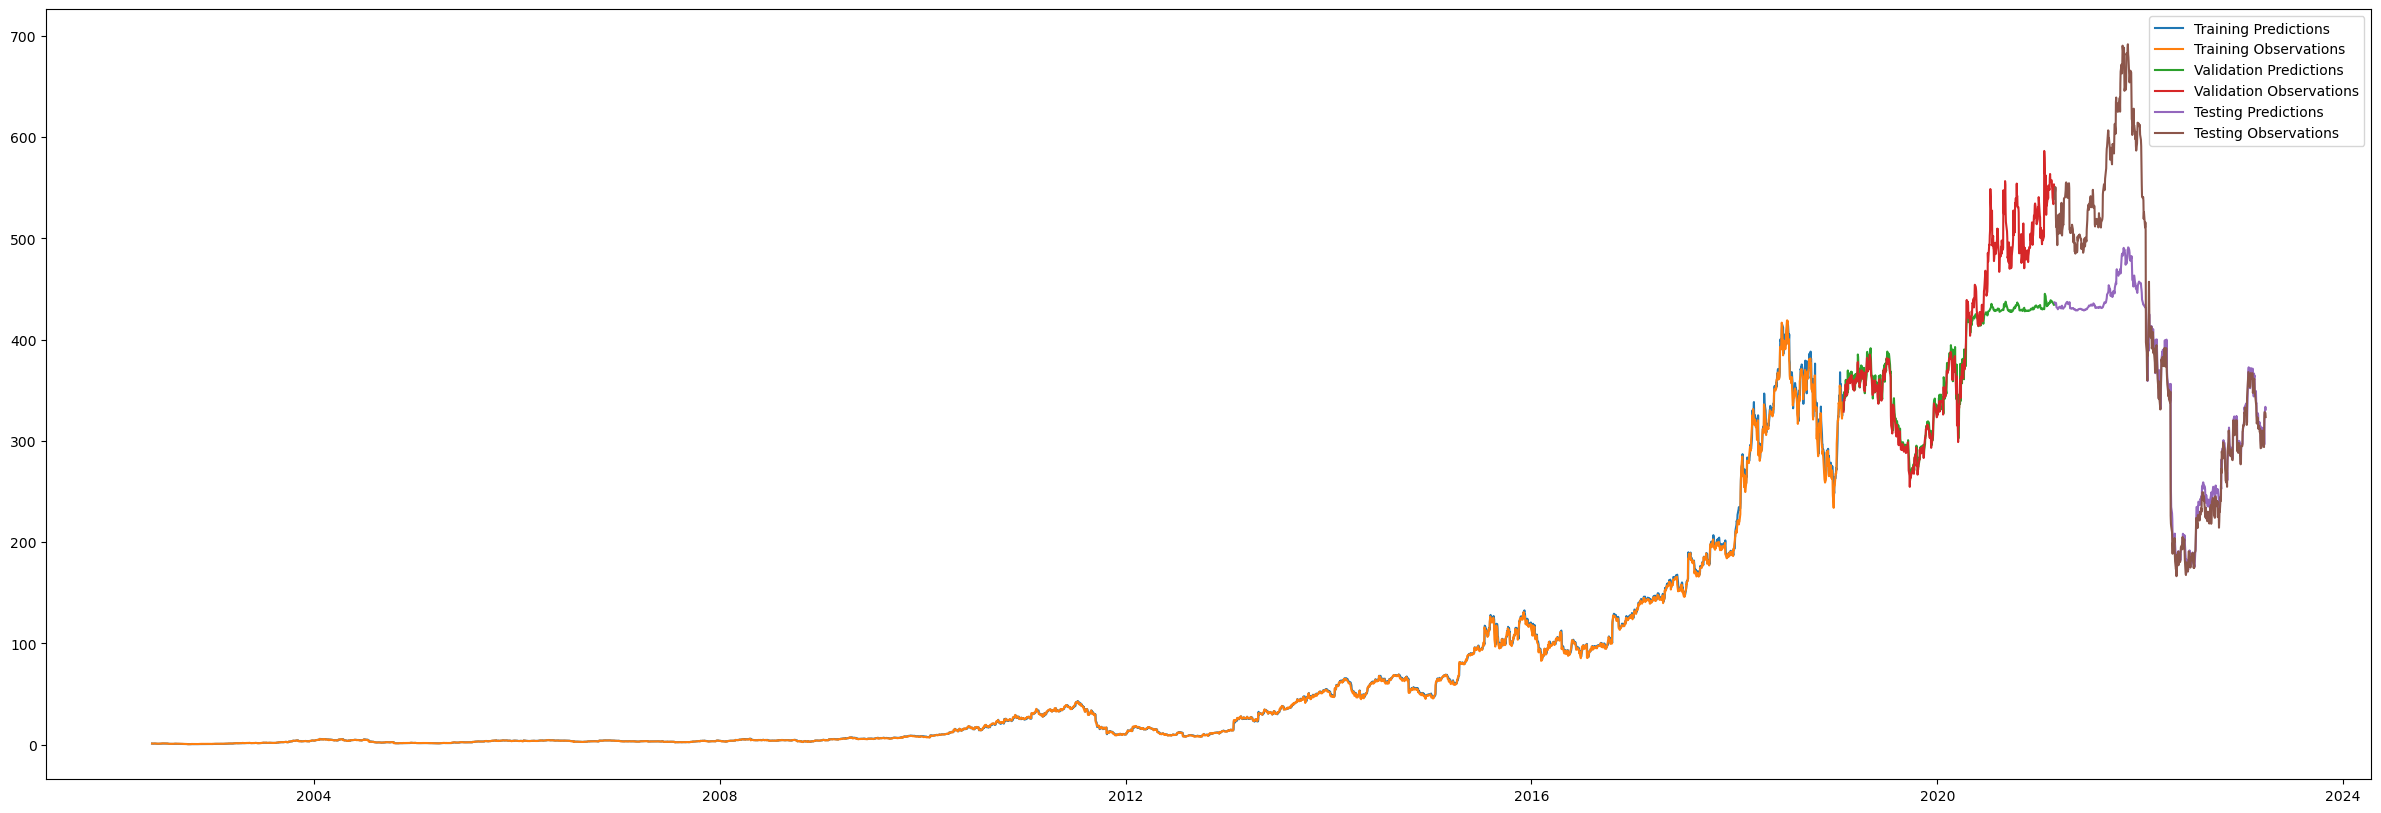

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [23]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 34ms/step


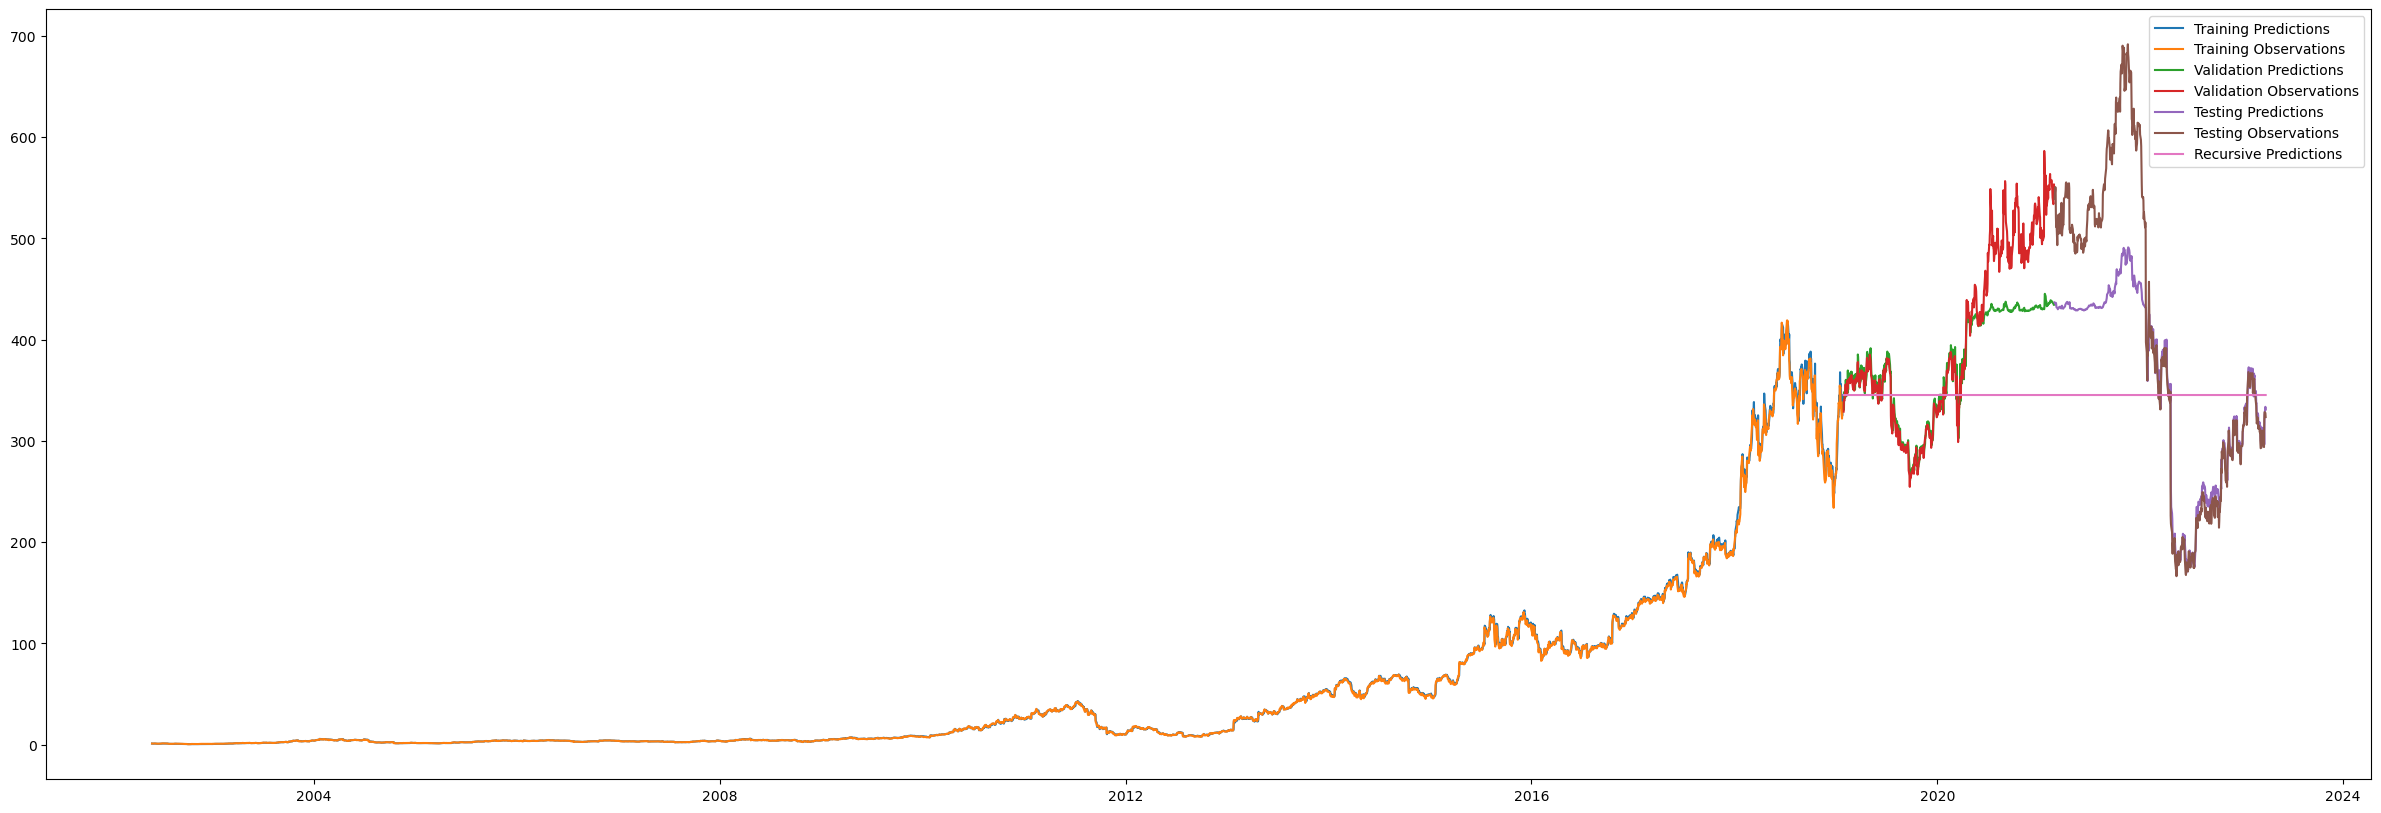

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])